In [14]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

# 从硬盘读取数据进入内存
data = pd.read_csv(r'C:\Users\LindaHK\Desktop\DATA.csv')
data1=data.drop(['Y1'],axis=1)*100
y=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','Y1']
data1['X1']=data1['X1'].apply(int)
data1['X2']=data1['X2'].apply(int)
data1['X3']=data1['X3'].apply(int)
data1['X4']=data1['X4'].apply(int)
data1['X5']=data1['X5'].apply(int)
data1['X6']=data1['X6'].apply(int)
data1['X7']=data1['X7'].apply(int)
data1['X8']=data1['X8'].apply(int)
data1['X9']=data1['X9'].apply(int)
data1['X10']=data1['X10'].apply(int)
data1['X11']=data1['X11'].apply(int)

In [15]:
def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = gray - gray.min()/ gray.max() - gray.min()
    # 标准化
    std= gray.iloc[:, m]  # 为标准要素
    ce = gray.iloc[:, 0:]  # 为比较要素
    n, m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = np.amax(a), np.amin(a)

    # 计算值
    result = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    return pd.DataFrame([np.mean(result[i, :]) for i in range(m)])


def GRA(DataFrame):
    list_columns = [
        str(s) for s in range(len(DataFrame.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    for i in range(len(DataFrame.columns)):
        df_local.iloc[:, i] = GRA_ONE(DataFrame, m=i)[0]
    return df_local

data_gra = GRA_ONE(data1)
path=r'C:\Users\LindaHK\Desktop\manufacture\'
data_gra.to_csv(path+"GRA.csv") 
print(data_gra)

SyntaxError: EOL while scanning string literal (<ipython-input-15-7283eec1ecd2>, line 38)

In [37]:
import pandas as pd
import numpy as np
import math
from numpy import array
 
# 1读取数据
df = pd.read_csv(r'C:\Users\LindaHK\Desktop\DATA.csv')
df1=df.drop('Y1', axis=1)*100
# 2数据预处理 ,去除空值的记录
#df.dropna()
 
#定义熵值法函数
def cal_weight(x):
    '''熵值法计算变量的权重'''
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
 
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
 
    lnf = [[None] * cols for i in range(rows)]
 
    # 矩阵计算--
    # 信息熵
    # p=array(p)
    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
 
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    
    w = pd.DataFrame(w)
    return w
 
 
if __name__ == '__main__':
    # 计算df各字段的权重
    w = cal_weight(df1)  # 调用cal_weight
    w.index = df1.columns
    w.columns = ['weight']
    print(w)
    print('运行完成!')

       weight
X1   0.106342
X2   0.045583
X3   0.064655
X4   0.074397
X5   0.111378
X6   0.097434
X7   0.221428
X8   0.034383
X9   0.120531
X10  0.068688
X11  0.055181
运行完成!


In [38]:
w['weight']=w['weight'].apply(float)

In [39]:
w2 = pd.DataFrame(w.values.T, index=w.columns, columns=w.index)#转置

In [40]:
w2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
weight,0.106342,0.045583,0.064655,0.074397,0.111378,0.097434,0.221428,0.034383,0.120531,0.068688,0.055181


In [41]:
w.to_excel(path+"GRA.xlsx")

In [42]:
w=np.array(w)

In [43]:
data_gra=np.array(data_gra)

In [44]:
w.shape

(11, 1)

In [45]:
pd.DataFrame(data_gra)

,0
0,1.000000
1,0.997494
2,0.997864
3,0.858294
4,0.915103
5,0.847215
6,0.936303
7,0.984055
8,0.970661
9,0.997103


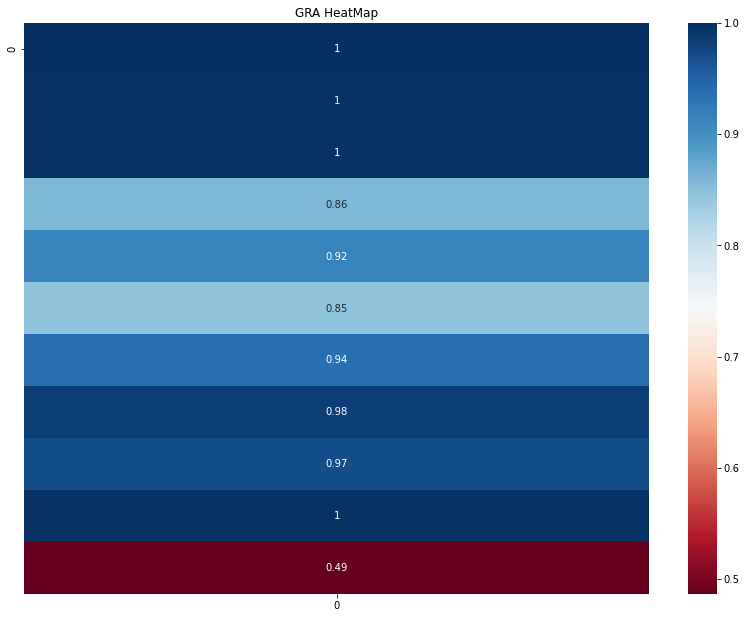

In [26]:
# 灰色关联结果矩阵可视化
import seaborn as sns


def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    f, ax = plt.subplots(figsize=(14, 10.5))
    ax.set_title('GRA HeatMap')
    sns.heatmap(DataFrame.astype(float),
                cmap=colormap,
                ax=ax,
                annot=True,
                yticklabels=14,
                xticklabels=10)
    plt.show()


ShowGRAHeatMap(data_gra)


In [46]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

# 从硬盘读取数据进入内存
data = pd.read_csv(r'C:\Users\LindaHK\Desktop\DATA.csv')
data1=data.drop(['Y1'],axis=1)*100
y=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','Y1']
data1['X1']=data1['X1'].apply(int)
data1['X2']=data1['X2'].apply(int)
data1['X3']=data1['X3'].apply(int)
data1['X4']=data1['X4'].apply(int)
data1['X5']=data1['X5'].apply(int)
data1['X6']=data1['X6'].apply(int)
data1['X7']=data1['X7'].apply(int)
data1['X8']=data1['X8'].apply(int)
data1['X9']=data1['X9'].apply(int)
data1['X10']=data1['X10'].apply(int)
data1['X11']=data1['X11'].apply(int)

In [47]:
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

def GRA_ONE(gray, m=0):
    # 读取为df格式
    gray = dimensionlessProcessing(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    c, d = amax(a), amin(a)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local


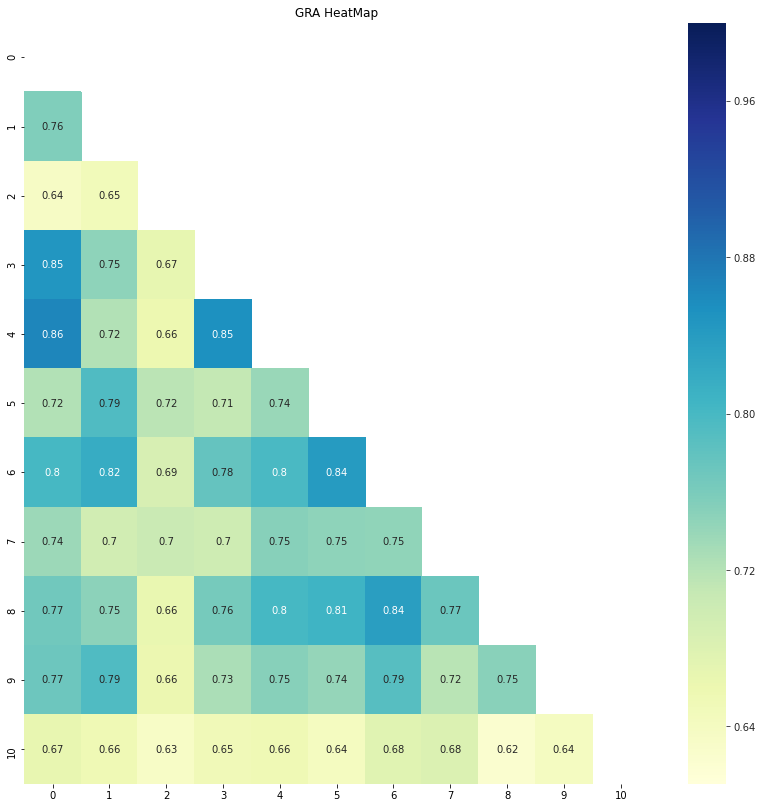

In [49]:
# 灰色关联结果矩阵可视化
# 灰色关联结果矩阵可视化
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    mask=mask,
                   )
    plt.show()
    
data_gra = GRA(data1)
ShowGRAHeatMap(data_wine_gra)
